# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left((Y_n-Y_{n+h})^2\right) = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


**Réponses**

1. Soit $i \in \mathbb{N}^*$.

$\ X_i$ prend un nombre fini de valeurs, elle est donc intégrable et de carré intégrable, ce qui justifie l'existence de son espérance et de sa variance.

On a : $$\mathbb{E}(X_i) = \sum_{x \in X(\Omega)} x \ \mathbb{P}(X_i=x) = 1 \times \frac{1}{2} + \ (-1) \times \frac{1}{2} = 0.$$

Et $$\mathbb{V}(X_i) = \mathbb{E}(X_i^2) - \mathbb{E}(X_i)^2 = \sum_{x \in X(\Omega)} x^2 \ \mathbb{P}(X_i=x) = 1 \times \frac{1}{2} + 1 \times \frac{1}{2} = 1.$$

2. Soit $n \in \mathbb{N}^*$.

$Y_n$ est de carré intégrable comme somme finie de variables aléatoires de carré intégrable, ce qui justifie l'existence de son espérance et de sa variance.

On a donc, par indépendance des $(X_i)$:
$$\mathbb{E}(Y_n) = \sum_{i=1}^n \mathbb{E}(X_i) = 0$$

Et: $$\mathbb{V}(Y_n) = \sum_{i=1}^n \mathbb{V}(X_i) = n = \mathbb{E}(Y_n^2).$$

3. Soit $n \in \mathbb N$ et $(y_0, \ldots, y_n) \in \mathbb{R}^n$. 

Remarquons déjà que $\forall i \in \{1, \ldots, n-1 \}, \ X_n$ et $Y_i$ sont indépendantes :

Soit $i \in \{1, \ldots, n-1\}$. 
$f:(y_0, \ldots, y_i) \mapsto \sum_{j=0}^{i} y_i$ est mesurable et déterministe et $X_n$ et $(X_0, \ldots, X_i)$ sont indépendantes par coalition. Donc, par transfert d'indépendance, on en déduit l'indépendance de $X_n$ et $Y_i$, qui fournit ensuite l'indépendance de $X_n$ avec $(Y_i)_{1 \leq i \leq n-1}$ par coalition.

On a ensuite :
\begin{align*}
\mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0})
    &= \mathbb{P}(X_n = y_n-y_{n-1}|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}) \\
    &= \mathbb{P}(X_n = y_n-y_{n-1}) \text{ par indépendance de } X_n \text{ avec } (Y_i)_{1 \leq i \leq n-1} \\
\end{align*}

Et par indépendance de $X_n$ et $Y_{n-1}$ :

$$\mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}) = \mathbb{P}(X_n = y_n - y_{n-1}|Y_{n-1} = y_{n-1}) = \mathbb{P}(X_n = y_n - y_{n-1}).$$

D'où : $$\boxed{\mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}) = \mathbb{P}(Y_n = y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0})}$$


4. Soit $(n, n') \in (\mathbb{N}^*)^2$.

\begin{align*}
Cov(Y_n, Y_{n-1}) 
        &= \mathbb{E}((Y_n - \mathbb{E}(Y_n))(Y_{n'} - \mathbb{E}(Y_{n'}))) \\
        &= \mathbb{E}(Y_nY_{n'}) - \mathbb{E}(Y_n)\mathbb{E}(Y_{n'})\\
        &= \mathbb{E}(Y_nY_{n'})
\end{align*}

Or
\begin{align*}
Y_nY_{n'}
    &= (\sum_{i=1}^n X_i)(\sum_{i=1}^{n'} X_i) \\
    &= \sum_{i=1}^{min(n,n')} X_i^2 + \sum_{1 \leq i \leq n \\ 1 \leq j \leq n' \\ i \neq j} X_iX_j \\
\mathbb{E}(Y_nY_{n'})
    &= \sum_{i=1}^{min(n,n')} 1 + \sum_{1 \leq i \leq n \\ 1 \leq j \leq n' \\ i \neq j} 0 \\
    &= min(n, n')
\end{align*}

D'où $$\boxed{Cov(Y_n, Y_{n-1}) = min(n, n')}.$$

Ensuite, $\forall h \in \mathbb{N}^*$, on a :

\begin{align*}
\frac{1}{2} \mathbb{E}((Y_n - Y_{n+h}^2)^2)
    &= \frac{1}{2} (\mathbb{E}(Y_n^2) \mathbb{E}(Y_{n+h}^2) - 2 \mathbb{E}(Y_nY_{n+h})) \\
    &= \frac{1}{2} (n + (n+h) - 2n) \text{ d'après le calcul précédent} \\
    &= \frac{h}{2}.
\end{align*}

5. Les $X_n$ sont des variables aléatoires réelles, indépendantes et de même loi, de carré intégrable, d'espérance $0$ et de variance $1$.

Par le théorème central limite, on a $\frac{\sum_{i=1}^n X_i - n \times 0}{1 \times \sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$

Donc $$ \boxed{\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)}$$

In [1]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



**Réponses**

1. Déjà, les $(t_i, t_{i+1}]$ sont deux à deux disjoints et tous non vides (car $t_i < t_{i+1}$). Ensuite :
\begin{align*}
\bigcup_{i=0}^{n-1}(t_i, t_{i+1}] 
    &= \bigcup_{i=0}^{n-1}(\frac{i}{n}, \frac{i+1}{n}]\\
    &= (\frac{0}{n}, \frac{n}{n}]\\
    &= (0, 1]
\end{align*}
Donc les $(t_i, t_{i+1}]$ forment une partition de $(0, 1]$.

2. On a $[nt_i] = [n\frac{i}{n}] = [i] = [nt]$ donc $Y_{[nt]} = Y_{[nt_i]}$. D'où $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. 

In [3]:
def X_i():
    if np.random.binomial(1, 0.5):
        return -1
    else:
        return 1

def Y(n):
    res = 0
    for _ in range(n):
        res += X_i()
    return res



Dans toute la suite du projet, on définira des fonctions $Z$ et $Z_{list}$ : la fonction $Z$ représente la variable aléatoire $Z_t$, tandis que la fonction $Z_{list}(n)$ renvoie une liste de $n$ valeurs de $Z$. Certaines d'entre elles fixent les valeurs des $X_i$ et $U_i$ de manière à obtenir une évolution continue de $Z$ et à pouvoir tracer une trajectoire.

In [4]:
def Z(t, n):
    return Y(math.floor(n*t))/np.sqrt(n)

def Z_list(n):
    """
    Args: n le nombre de valeurs à renvoyer.
    
    Returns: une liste contenant n valeurs de Z.
    """
    res = 0
    path = []
    for _ in range(n):
        res += X_i()
        path.append(res/sqrt(n))
    return path

Remarque : On pourrait également implémenter les $X_i$ en remarquant qu'ils suivent la même loi que $2\times V -1$ où $V$ est une variable aléatoire suivant une loi de Bernoulli de paramètre $\frac{1}{2}$.

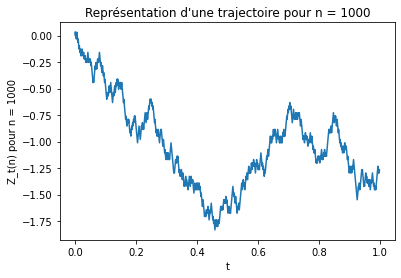

In [5]:
n = 1_000

X = [i/n for i in range(n)]
Y = Z_list(n)

plt.plot(X, Y)
plt.xlabel('t')
plt.ylabel('Z_t(n) pour n = 1000')
plt.title("Représentation d'une trajectoire pour n = 1000")
plt.show()

On obtient la trajectoire d'un mouvement brownien.

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



**Réponse 4**

Soit $t \in ]0,1]$. 

Appliquons le théorème central limite.

Les $(X_k)_{k \in \{ 1, ..., [tn] \}}$ sont des variables aléatoires réelles, indépendantes et de même loi, de carré intégrable, d'espérance nulle et de variance $1$.

Par le théorème central limite, et comme $\frac{1}{\sqrt{nt}} \sim_{n \to \infty} \frac{1}{\sqrt{[nt]}}$, on a :$$\frac{\sum_{k=1}^{[nt]} X_k}{\sqrt{nt}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1).$$

Donc : $$\frac{Z^{(n)}_t}{\sqrt{t}} = \frac{Y_{[kn]}}{\sqrt{nt}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$$

Puis par linéarité de la loi normale :

$$Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}} \sqrt{t} \ \mathcal{N}(0,1) = \mathcal{N}(0, t)$$

Enfin, pour $t=0$, $\forall n \in \mathbb{N}, Z^{(n)}_t$ est presque sûrement nulle et $\mathcal{N}(0, 0)$ est presque sûrement nulle. On obtient donc le résultat pour tout $t \in [0,1]$.

On en déduit que $Z_1^{(n)}$ suit une loi normale d'espérance $0$ et de variance $1$.

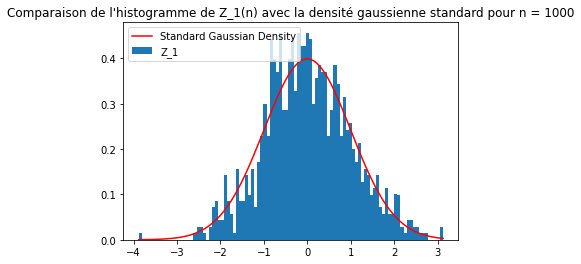

In [6]:
X = np.arange(1_000)
Z_1 = [np.random.standard_normal() for x in X]

X_gauss = np.linspace(min(Z_1), max(Z_1), 200)
Y_gauss = [sps.norm.pdf(x, 0, 1) for x in X_gauss]

plt.hist(Z_1, bins = 100, density = True, label = 'Z_1')
plt.plot(X_gauss, Y_gauss, 'r', label = 'Standard Gaussian Density')
plt.legend(loc='best')
plt.title("Comparaison de l'histogramme de Z_1(n) avec la densité gaussienne standard pour n = 1000")
plt.show()

La densité gaussienne standard est similaire à la densité donnée par l'échantillonage de $Z^{(1000)}$. On remarque que le nombre de colonnes choisi pour représenter l'histogramme influence cette densité.

**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

**Question 1**

Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

**Réponse 1**

In [21]:
def Z_tild(t, n):
    res = 0
    X = [X_i() for _ in range(n)]
    U = np.random.uniform(1, 0.5, size = n)
    for i in range(n):
        res += X[i]*((U[i]<t)*1 - (U[i]>t)*1)
    return res/np.sqrt(n)

In [8]:
def Z_tild_list(t, n, U, X):
    """
    Args: t, n comme définis dans l'énoncé,
            U une liste des tirages des U_i pour i entre 1 et n,
            X une liste des tirages des X_i pour i entre 1 et n.
    
    Returns: une liste de n tirages de Z_tild en prenant les valeurs des U_i et X_i en argument.
    """
    res = 0
    for i in range(n):
        res += X[i]*((U[i]<t)*1 - (U[i]>t)*1)
    return res/np.sqrt(n)

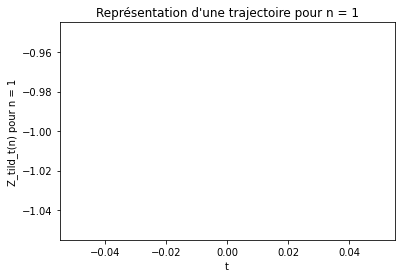

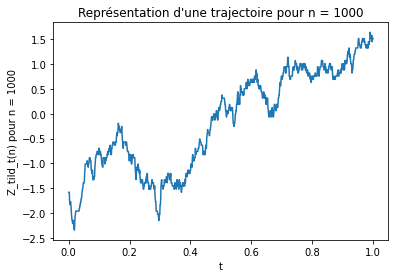

In [22]:
def trajectoire(n):
    T = np.linspace(0, 1, n)
    U = np.random.uniform(0, 1, size=n)
    X = [X_i() for _ in range(n)]
    Z = [Z_tild_list(k/n, n, U, X) for k in range(n)]
    plt.plot(T, Z)
    plt.xlabel('t')
    plt.ylabel(f'Z_tild_t(n) pour n = {n}')
    plt.title(f"Représentation d'une trajectoire pour n = {n}")
    plt.show()
    
trajectoire(n=1)
trajectoire(n=1_000)

[1.0]
[0.]


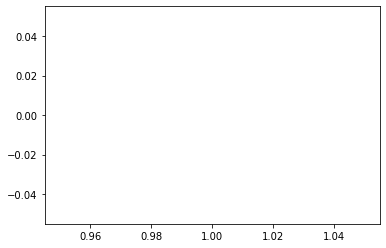

In [23]:
n=1
T = np.linspace(0, 1, n)
U = np.random.uniform(0, 1, size=n)
X = [X_i() for _ in range(n)]
Z = [Z_tild_list(k/n, n, U, X) for k in range(n)]
print(Z)
print(T)
plt.plot(Z,T)
plt.show()

Pour $n=1$, on obtient bien une marche aléatoire (descendante ou montante). Pour des valeurs de $n$ grandes, on obtient la trajectoire d'un mouvement brownien.

**Question 2**

Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

**Réponse 2**

**Calcul de l'espérance**

À $i$ fixé, $X_i$ et $U_i$ sont indépendantes donc on a :

\begin{align*}
\mathbb{E}(\tilde{Z}^{(n)}_t)
    &= \frac{1}{\sqrt{n}} \sum_{i=1}^n \mathbb{E}(X_i(\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t))) \\
    &= \frac{1}{\sqrt{n}} \sum_{i=1}^n \mathbb{E}(X_i)\mathbb{E}(\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t)) \\
    &= 0
\end{align*}

**Calcul de la variance**

\begin{align*}
\mathbb{V}(\tilde{Z}^{(n)}_t)
    &= \frac{1}{n} \sum_{i=1}^n \mathbb{V}(X_i(\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t)))
\end{align*}

Or
\begin{align*}
\forall i \in \mathbb{N}, \
\mathbb{V}(X_i(\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t)))
    &= \mathbb{E}((X_i(\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t)))^2) - \mathbb{E}(X_i(\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t)))^2\\
    &= \mathbb{E}(X_i^2)\mathbb{E}((\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t))^2) - \mathbb{E}(X_i)^2\mathbb{E}(\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t))^2 \\
    &= \mathbb{E}(X_i^2)\mathbb{E}((\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t))^2) \ \ \text{ car } \mathbb{E}(X_i)=0
\end{align*}

Et
\begin{align*}
\forall i \in \mathbb{N}, \
\mathbb{E}((\mathbb{1}_{[0, U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t))^2)
    &= \mathbb{E}(\mathbb{1}_{[0, U_i]}^2 - 2 \mathbb{1}_{[0, U_i]}\mathbb{1}_{]U_i, 1]} + \mathbb{1}_{]U_i, 1]}^2) \\
    &= \mathbb{E}(\mathbb{1}_{[0, U_i]}^2 + \mathbb{1}_{]U_i, 1]}^2) \\
    &= \mathbb{E}(\mathbb{1}_{[0, U_i]} + \mathbb{1}_{]U_i, 1]}) \\
    &= \mathbb{E}(\mathbb{1}_{[0, 1]}(t)) \\
    &= \mathbb{P}(t \in [0,1]) \\
    &= 1
\end{align*}

Finalement : $$\mathbb{V}(\tilde{Z}^{(n)}_t) = \frac{1}{n} \sum_{i=1}^n 1 = 1.$$

Les $X_i$ sont i.i.d., les $U_i$ sont i.i.d., donc les $X_i(\mathbb{1}_{[0, U_i]} - \mathbb{1}_{]U_i, 1]})$ sont toutes de même loi et sont indépendantes. Elles sont d'espérance $0$ et de variance $1$ comme montré précédemment.

Par le théorème central limite, on en déduit que $$\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$$

Pour le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)},$ on choisit $n=1000$.

In [10]:
def test_plot_Z_tild(t, N_SIMUS):
    T = np.arange(0, N_SIMUS)
    U = np.random.uniform(1, 0.5, size = n)
    X = [X_i() for _ in range(n)]
    Y = [Z_tild(t, 1_000) for t in T]
    X_gauss = np.linspace(min(Y), max(Y), 200)
    Y_gauss = [sps.norm.pdf(x, 0, 1) for x in X_gauss]
    return T, Y, X_gauss, Y_gauss

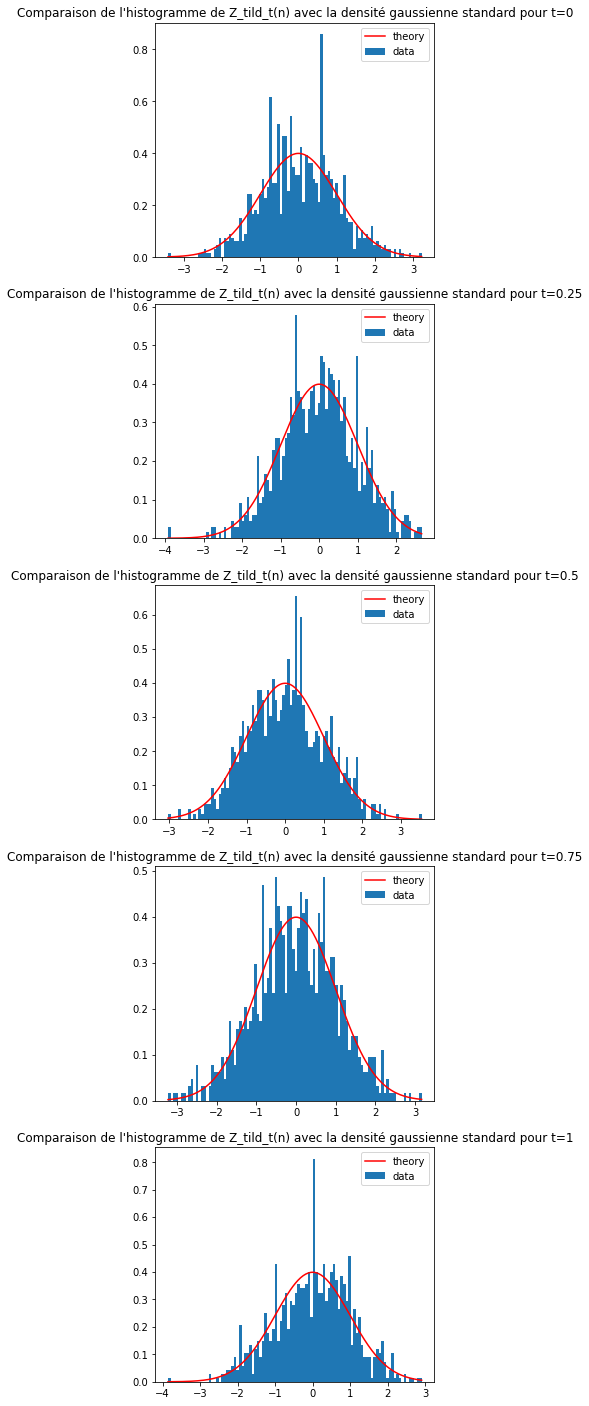

In [11]:
T = [0, 0.25, 0.5, 0.75, 1]
N_SIMUS = 1_000
_, axs = plt.subplots(5, figsize = (5, 25))
for j in range(5):
    X, Y, X_gauss, Y_gauss = test_plot_Z_tild(T[j], N_SIMUS)
    axs[j].hist(Y, bins = 100, density=True, label = 'data')
    axs[j].plot(X_gauss, Y_gauss, 'r', label = 'theory')
    axs[j].legend(loc='best')
    axs[j].set_title(f"Comparaison de l'histogramme de Z_tild_t(n) avec la densité gaussienne standard pour t={T[j]}")

A nouveau, la densité gaussienne standard théorique est proche de la densité expérimentale obtenue grâce aux échantillonages pour les différentes valeurs de $t$.

**Question 3**

Montrer que $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h$ pour $h>0$ et tel que $t+h \leq 1$, pour une constante $a$ à déterminer.

**Réponse 3**

\begin{align*}
\tilde{Z}_t^{(n)} - \tilde{Z}_{t+h}^{(n)}
    &= \frac{1}{\sqrt{n}}(\sum_{i=1}^n X_i(\mathbb{1}_{[0,U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t) - \mathbb{1}_{[0,U_i]}(t+h) + \mathbb{1}_{]U_i,1]}(t+h)) \\
(\tilde{Z}_t^{(n)} - \tilde{Z}_{t+h}^{(n)})^2
    &= \frac{1}{n} \sum_{i = 1}^n \sum_{j=1}^n X_i \ X_j \ (\mathbb{1}_{[0,U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t) - \mathbb{1}_{[0,U_i]}(t+h) + \mathbb{1}_{]U_i,1]}(t+h)) (\mathbb{1}_{[0,U_j]}(t) - \mathbb{1}_{]U_j, 1]}(t) - \mathbb{1}_{[0,U_j]}(t+h) + \mathbb{1}_{]U_j,1]}(t+h)) \\
\mathbb{E}((\tilde{Z}_t^{(n)} - \tilde{Z}_{t+h}^{(n)})^2)
    &= \frac{1}{n}\sum_{i = 1}^n \sum_{j=1}^n \mathbb{E}(X_iX_j)\mathbb{E} ((\mathbb{1}_{[0,U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t) - \mathbb{1}_{[0,U_i]}(t+h) + \mathbb{1}_{]U_i,1]}(t+h)) (\mathbb{1}_{[0,U_j]}(t) - \mathbb{1}_{]U_j, 1]}(t) - \mathbb{1}_{[0,U_j]}(t+h) + \mathbb{1}_{]U_j,1]}(t+h)))\\
    &= \frac{1}{n} \sum_{i=1}^n \mathbb{E} ((\mathbb{1}_{[0,U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t) - \mathbb{1}_{[0,U_i]}(t+h) + \mathbb{1}_{]U_i,1]}(t+h))^2) \\
    &\text{ car pour tous } i \neq j, \ \mathbb{E}(X_iX_j) = \mathbb{E}(X_i)\mathbb{E}(X_j) = 0 \text{ et } \mathbb{E}(X_i^2) = 1 \text{ (variance)} \\
\end{align*}

Or $A_i(t,h) = \mathbb{1}_{[0,U_i]}(t) - \mathbb{1}_{]U_i, 1]}(t) - \mathbb{1}_{[0,U_i]}(t+h) + \mathbb{1}_{]U_i,1]}(t+h) = 2 \times \mathbb{1}_{[0, U_i]}(t) \times \mathbb{1}_{]U_i, 1]}(t+h)$.

En effet, 
- si $t \leq U_i$ :
    - si $t+h \leq U_i$ : alors $A_i(t,h) = 0$
    - si $t+h > U_i$ : alors $A_i(t, h) = 2$
- si $t > U_i$ alors $t+h>U_i$ donc $A_i(t,h)=0$.

Donc :

\begin{align*}
\mathbb{E}((\tilde{Z}_t^{(n)} - \tilde{Z}_{t+h}^{(n)})^2)
    &= \frac{1}{n} \sum_{i=1}^n \mathbb{E}((2\times\mathbb{1}_{[0, U_i]}(t) \times \mathbb{1}_{]U_i, 1]}(t+h))^2) \\
    &= \frac{4}{n} \sum_{i=1}^n \mathbb{E}((\mathbb{1}_{[0, U_i]}(t) \times \mathbb{1}_{]U_i, 1]}(t+h))^2) \\
    &= \frac{4}{n} \sum_{i=1}^n \mathbb{E}(\mathbb{1}_{[0, U_i]}(t) \times \mathbb{1}_{]U_i, 1]}(t+h)) \\
    &= \frac{4}{n} \sum_{i=1}^n \mathbb{P}(U_i \in [t, t+h[) \\
    &= \frac{4}{n} \sum_{i=1}^n \frac{t+h-t}{1-0}\\
    &= 4h
\end{align*}

Finalement : $$\frac{1}{2} \mathbb{E}((\tilde{Z}_t^{(n)} - \tilde{Z}_{t+h}^{(n)})^2) = 2h.$$

**Question 4**

Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

**Réponse 4**

On note $A_h = \{(i,j),|t_i-t_j|=h \}$ et on calcule la quantité demandée avec $n=1000$.


On remarque que $\frac1{\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ représente une appr
oximation expérimentale de l'espérance $\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right)$.

Soit $i \in \{1, ...n \}$. $\forall j \in \{1, ..., n \}$ :  
\begin{align*}
|t_i-t_j|=h &\iff |i - j|=hn\\
            &\iff j = i+hn \text{ ou } j = i-hn
\end{align*}

Donc $A_h = \{(i, i+hn), (i+hn, i) : i \in \{0,..., n(1-h)\}\}$.

\begin{align*}
\frac1{\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2
    &= \frac{1}{\text{card}(A_h)}\sum_{(i,j) \in A_h}(\tilde{Z}^{n}_{\frac{i}{n}} - \tilde{Z}^{n}_{\frac{j}{n}})^2\\
    &= \frac{1}{\text{card}(A_h)}\sum_{i \in \{ 0, ..., n(1-h) \}}(\tilde{Z}^{n}_{\frac{i}{n}} - \tilde{Z}^{n}_{\frac{i + hn}{n}})^2 + (\tilde{Z}^{n}_{\frac{i+hn}{n}} - \tilde{Z}^{n}_{\frac{i}{n}})^2\\
    &= \frac{1}{2(n(1-h)+1)}\sum_{i \in \{ 0, ..., n(1-h) \}}2(\tilde{Z}^{n}_{\frac{i}{n}} - \tilde{Z}^{n}_{\frac{i+hn}{n}})^2\\
    &= \frac{1}{n(1-h)+1}\sum_{i \in \{ 0, ..., n(1-h) \}}(\tilde{Z}^{n}_{\frac{i}{n}} - \tilde{Z}^{n}_{\frac{i+hn}{n}})^2
\end{align*}

Cette nouvelle formule est celle utilisée pour l'implémentation du programme suivant.

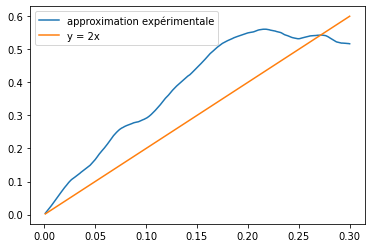

In [25]:
n = 1_000
H = np.arange(0.001, 0.301, 0.001)

X = [X_i() for _ in range(n)] # liste des Xi
U = [np.random.uniform() for _ in range(n)] # liste des Ui
Z = [Z_tild_list(k/n, n, U, X) for k in range(n+1)]

Q_data = []
Q_theoric = 2*H

for h in H:
    q = 0
    A_h = []
    card = 0
    nh = int(n*h)
    for i in range(n - nh + 1):
        q += (Z[i] - Z[i + nh])**2
        card += 1
    q /= card
    Q_data.append(q)

plt.plot(H, Q_data, label = 'approximation expérimentale')
plt.plot(H, Q_theoric, label = 'y = 2x')
plt.legend()
plt.show()

On remarque déjà que l'allure de la courbe varie beaucoup en fonction des tirages aléatoires.

Pour des valeurs de $h$ petites, typiquement $h \leq 0.05$, le calcul expérimental est très proche de la valeur théorique $2*h$. 

En revanche, pour des valeurs plus élevées de $h$, l'approximation est assez éloignée de la valeur exacte. Cela s'explique par le fait que le nombre d'entiers $i$ compris entre $0$ et $n(h-1)$ diminue. La moyenne se fait donc sur un plus petit nombre de valeurs, et est plus éloignée de l'espérance. Typiquement, pour $h = 0.3$, on prend $600$ valeurs au lieu de $1000$.

**Question 5**

Décrire les différences et les similarités entre les deux approches.

**Réponse 5**

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

On peut ainsi écrire la version 2D de $\tilde{Z}$ de la manière suivante :
$$\tilde{Z}^{(n)}_{(x,y)} = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{\{x \cos(\alpha) + y \sin(\alpha) \leq p\}}-1_{\{x \cos(\alpha) + y \sin(\alpha) > p\}})$$

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

**Réponse**

Si $\alpha = 0$ ou $\alpha = \pi$, alors $sin(\alpha) = 0$ donc la droite a pour équation $x = \frac{p}{cos(\alpha)}$.

Sinon, la droite a pour équation $y = \frac{p-xcos(\alpha)}{sin(\alpha)}$.

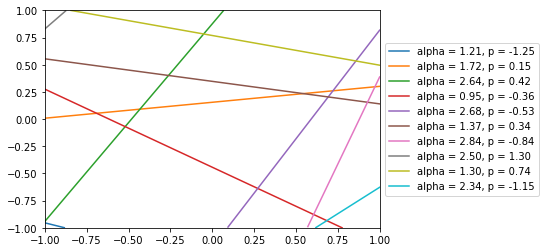

In [27]:
def random_straight_line(n_grid=200):
    alpha = np.random.uniform(0, np.pi)
    p = np.random.uniform(-np.sqrt(2), np.sqrt(2))
    if alpha == 0 or alpha == np.pi:
        return [p/np.cos(alpha)]*50, np.linspace(-1, 1, n_grid), alpha, p
    X_ = np.linspace(-1, 1, n_grid)
    Y = []
    X = []
    for k in range(n_grid):
        y = (p-X_[k]*np.cos(alpha))/np.sin(alpha)
        if y>= -1 and y<=1:
            Y.append(y)
            X.append(X_[k])
    return X, Y, alpha, p

for _ in range(10):
    X, Y, alpha, p = random_straight_line(500)
    plt.plot(X, Y, label = f"alpha = {alpha:.2f}, p = {p:.2f}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
plt.show()

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

/var/folders/xb/bj1v214d7c5_3lwphpynj_pm0000gn/T/ipykernel_54023/907149740.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, grid)


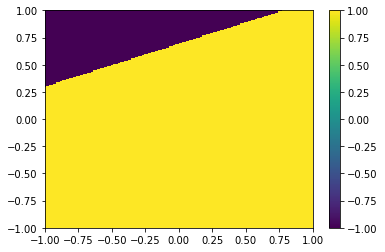

In [14]:
X, Y = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))

def generate_grid(X, Y, n=200):
    def f(x, y, alpha):
        return x*np.cos(alpha) + y*np.sin(alpha)
    x, y, alpha, p = random_straight_line()
    Z = f(X, Y, alpha)
    grid = np.ones((n,n))
    grid[Z>p]=-1
    return grid

grid = generate_grid(X, Y)
plt.pcolormesh(X, Y, grid)
plt.colorbar()
plt.show()

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

In [15]:
X, Y = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))

def generate_Z(X, Y, n=10_000, n_grid=200):
    Z = np.zeros((n_grid, n_grid))
    for _ in range(n):
        Z += X_i()
        Z = Z*generate_grid(X, Y, n_grid)
    return Z

def generate_Z_list(X, Y, Xi, n=10_000, n_grid=200):
    Z = np.zeros((n_grid, n_grid))
    for i in range(n):
        Z += Xi[i]
        Z = Z*generate_grid(X, Y, n_grid)
    return Z

/var/folders/xb/bj1v214d7c5_3lwphpynj_pm0000gn/T/ipykernel_54023/1450387869.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z)


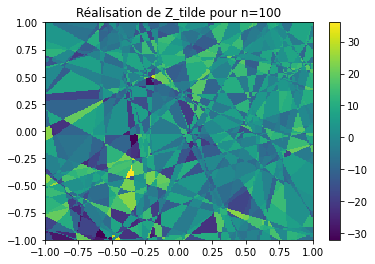

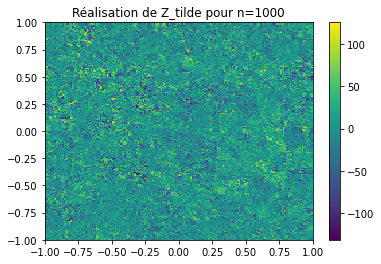

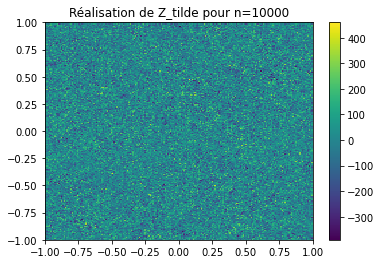

In [16]:
for n in [100, 1_000, 10_000]:
    Z = generate_Z(X, Y, n)
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.title(f"Réalisation de Z_tilde pour n={n}")
    plt.show()

Plus $n$ augmente, plus la plage de valeurs prises par $\tilde{Z}^{n}$ est grande et la texture d'apparence homogène.

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

Ici, $t_i$ et $t_j$ sont désormais des couples puisqu'on se place en deux dimensions.

On considère donc que $|.|$ désigne la distance euclidienne dans $\mathbb{R}^2$, c'est-à-dire que $|(i_1, j_1) - (i_2, j_2)| = h \iff |i_1-i_2|=h \text{ et } |j_1-j_2|=h$.

Comme dans la partie précédente, on obtient $\{((i_1, j_1), (i_2, j_2)) : |i_1-j_1| =|i_2-j_2| =h \}=\{((i, j), (i+nh, j+nh)), ((i, j + nh), (i+nh, j)), ((i+nh, j), (i, j+nh)), ((i+nh, j+nh), (i, j)) : (i,j) \in \{1, n-nh+1\}^2.$

In [17]:
print(np.shape(Z))

(200, 200)


In [ ]:
from itertools import product

n = 1_000
H = np.arange(0.001, 0.301, 0.001)

X, Y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))
Xi = [X_i() for _ in range(n)] # liste des Xi
Z = generate_Z_list(X, Y, Xi, n, n_grid = n)

Q_data = []
Q_theoric = 2*H

for h in H:
    q = 0
    A_h = []
    card = 0
    nh = int(n*h)
    for i, j in product(range(n - nh), range(n - nh)):
        q += (Z[i, j] - Z[i + nh, j + nh])**2
        q += (Z[i + nh, j] - Z[i, j + nh])**2
        q += (Z[i, j + nh] - Z[i + nh, j])**2
        q += (Z[i + nh, j + nh] - Z[i, j])**2
        card += 4
    q /= card
    Q_data.append(q)

n = 200
H = np.arange(0.001, 0.301, 0.001)
Q_data = []
plt.plot(H, Q_data, label = 'approximation expérimentale')
plt.legend()
plt.show()

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

**Réponse 5**

Cette fois-ci, $x,y \in [0,10]$, $\alpha \sim \mathcal{U}_{[0,\pi]}$ et $p \sim \mathcal{U}_{[-10\sqrt{2}, 10\sqrt{2}]}$.

In [ ]:
coeff = 10
X, Y = np.meshgrid(np.linspace(-coeff, coeff, 200), np.linspace(-coeff, coeff, 200))
def new_generate_Z(X, Y, n = 10_000, coeff = 10):
    # on génère une droite aléatoire
    def generate_random_right_line():
        alpha = np.random.uniform(0, np.pi)
        p = np.random.uniform(-coeff*np.sqrt(2), coeff*np.sqrt(2))
        if alpha == 0 or alpha == np.pi:
            return [p/np.cos(alpha)]*50, np.linspace(-coeff, coeff, 200), alpha, p
        X_ = np.linspace(-coeff, coeff, 200)
        Y = []
        X = []
        for k in range(200):
            y = (p-X_[k]*np.cos(alpha))/np.sin(alpha)
            if y>= -coeff and y<=coeff:
                Y.append(y)
                X.append(X_[k])
        return X, Y, alpha, p
    # on calcule la grille +1/-1
    def grid(X, Y, coeff, n):
        def f(x, y, alpha):
            return x*np.cos(alpha) + y*np.sin(alpha)
        x, y, alpha, p = generate_random_right_line()
        Z = f(X, Y, alpha)
        grid = np.ones((200, 200))
        grid[Z>p] = -1
        return grid
    # on calcule Z_tilde
    Z = np.zeros((200, 200))
    for _ in range(n):
        Z += X_i()
        Z = Z*grid(X, Y, coeff, n)
    return Z

Z = new_generate_Z(X, Y)
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.title(f"Réalisation de Z_tilde sur [-{coeff},{coeff}]x[-{coeff},{coeff}]")
plt.show()

On observe un résultat visuel similaire à celui obtenu pour le domaine $[-1, 1]^2$. $\tilde{Z}^{(n)}$ prend les mêmes valeurs.

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?